In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#question1
px = pd.read_csv("priceData.csv")

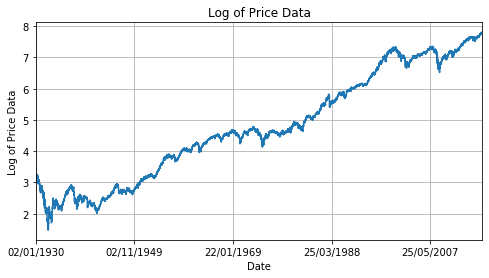

In [3]:
logpx = np.log(px["SPX Index"])
logpx.index = px["date"]
logpx.rename("Log of Price Data")
plt.figure(figsize=(8,4))
this = logpx.plot()
this.grid()
this.set_xlabel('Date')
this.set_ylabel('Log of Price Data')
this.set_title('Log of Price Data')
plt.savefig("logpx")

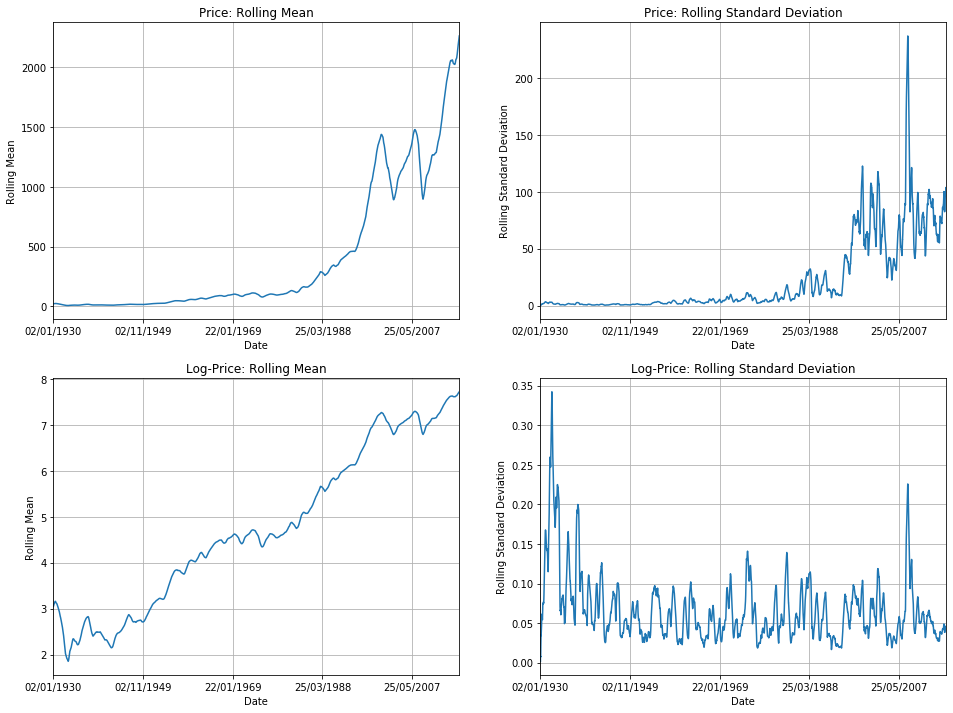

In [11]:
#question2
logpx_rolling_mean = logpx.rolling(252, min_periods=1).mean()
logpx_rolling_std = logpx.rolling(252, min_periods=1).std()
px_rolling_mean = px["SPX Index"].rolling(252, min_periods=1).mean()
px_rolling_std = px["SPX Index"].rolling(252, min_periods=1).std()
px_rolling_std.index = px["date"]
px_rolling_mean.index = px["date"]

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

px_rolling_mean.plot(ax = ax1) 
ax1.set_title("Price: Rolling Mean")  
ax1.set_xlabel("Date")  
ax1.set_ylabel("Rolling Mean")  
ax1.grid()

px_rolling_std.plot(ax = ax2)
ax2.set_title("Price: Rolling Standard Deviation")  
ax2.set_xlabel("Date")  
ax2.set_ylabel("Rolling Standard Deviation")  
ax2.grid()

logpx_rolling_mean.plot(ax = ax3) 
ax3.set_title("Log-Price: Rolling Mean")  
ax3.set_xlabel("Date")  
ax3.set_ylabel("Rolling Mean")  
ax3.grid()

logpx_rolling_std.plot(ax = ax4)
ax4.set_title("Log-Price: Rolling Standard Deviation")  
ax4.set_xlabel("Date")  
ax4.set_ylabel("Rolling Standard Deviation")  
ax4.grid()
plt.savefig("rolling")

In [ ]:
from statsmodels.tsa.stattools import adfuller

logpx_p_value = adfuller(logpx_rolling_mean)[1]
px_p_value = adfuller(logpx_rolling_std)[1]
logpx_p_value, px_p_value

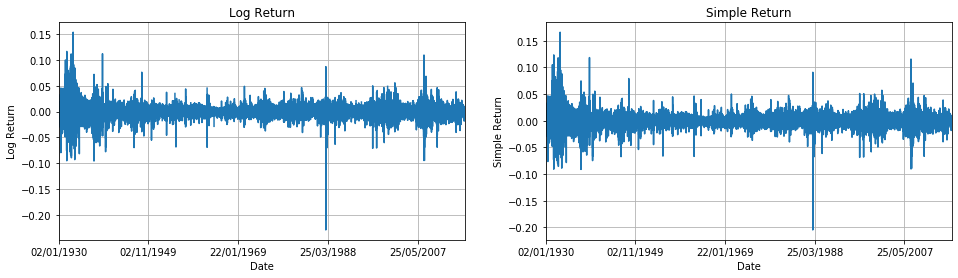

In [14]:
#question3
logret = logpx.diff()
simpret = px["SPX Index"].pct_change()
simpret.index = px["date"]

fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

logret.plot(ax = ax1) 
simpret.plot(ax = ax2)
ax1.set_title("Log Return")  
ax1.set_xlabel("Date")  
ax1.set_ylabel("Log Return")  
ax1.grid()


ax2.set_title("Simple Return")  
ax2.set_xlabel("Date")  
ax2.set_ylabel("Simple Return")  
ax2.grid()
plt.savefig("return")

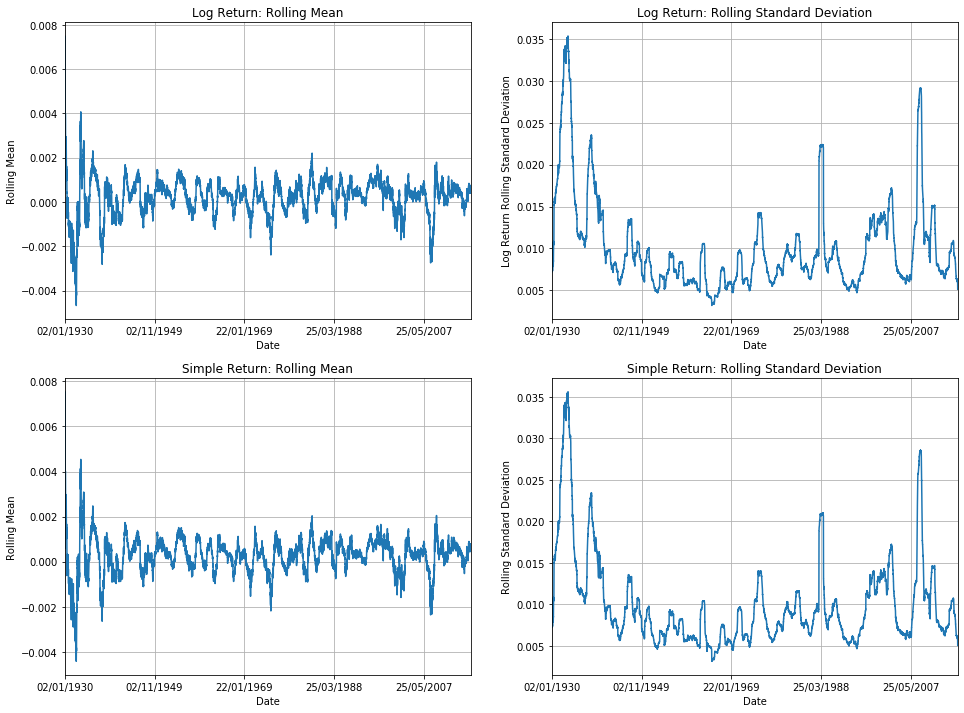

In [15]:
logret_rolling_mean = logret.rolling(252, min_periods=1).mean()
logret_rolling_std = logret.rolling(252, min_periods=1).std()
simpret_rolling_mean = simpret.rolling(252, min_periods=1).mean()
simpret_rolling_std = simpret.rolling(252, min_periods=1).std()

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

logret_rolling_mean.plot(ax = ax1) 
ax1.set_title("Log Return: Rolling Mean")  
ax1.set_xlabel("Date")  
ax1.set_ylabel("Rolling Mean")  
ax1.grid()

logret_rolling_std.plot(ax = ax2)
ax2.set_title("Log Return: Rolling Standard Deviation")  
ax2.set_xlabel("Date")  
ax2.set_ylabel("Log Return Rolling Standard Deviation")  
ax2.grid()

simpret_rolling_mean.plot(ax = ax3)  
ax3.set_title("Simple Return: Rolling Mean")
ax3.set_xlabel("Date")  
ax3.set_ylabel("Rolling Mean")  
ax3.grid()

simpret_rolling_std.plot(ax = ax4)
ax4.set_title("Simple Return: Rolling Standard Deviation")  
ax4.set_xlabel("Date")  
ax4.set_ylabel("Rolling Standard Deviation")  
ax4.grid()

plt.savefig("rolling_return")

In [113]:
#question4
from scipy import stats
test_simpret = stats.jarque_bera(simpret[1:])[1]
test_simpret

0.0

In [65]:
stats.jarque_bera(logret.dropna())[1]

0.0

In [16]:
#question5
stock_price = np.array([1, 2, 1])
s_logpx = np.log(stock_price)
s_logret = np.diff(s_logpx)
s_simpret = pd.DataFrame(stock_price)[0].pct_change().dropna()

In [17]:
s_logret

array([ 0.69314718, -0.69314718])

In [18]:
s_simpret

1    1.0
2   -0.5
Name: 0, dtype: float64